In [2]:
import pandas as pd
import os 
from scipy.stats import spearmanr, pearsonr
from statsmodels.stats.multitest import multipletests
from scipy import stats

path = "/home/user/Desktop/윤인수/data/"
tax_data = pd.read_csv(path+"/PC_normalized_PC92_HC384_130 genus_ML.csv")
path_data = pd.read_csv(path+"/PC Pathway.csv")
ortho_data = pd.read_csv(path+'/PC Orthology.csv')
mapping_df = pd.read_excel(path+ "/pathway_Orthology_map.xlsx")
tax_data
print(path_data.shape)
print(tax_data.shape)
print(ortho_data.shape)
print(mapping_df.shape)

(476, 449)
(476, 133)
(476, 14875)
(1552, 2)


In [8]:
tax_data

,study_no,group,group_1,Abiotrophia,Acetatifactor,Acholeplasmataceae_uc,Actinobacillus,Actinobaculum,Actinomyces,Aggregatibacter,...,Xanthomonas,Cloacibacterium,Legionella,Variovorax,Bergeriella,Ethanoligenens,Lentimicrobiaceae_uc,Moraxella,Mycoplasma_g13,Streptobacillus
study_no,,,,,,,,,,,,,,,,,,,,,
H1700097,H1700097,Cancer,1,0.00,0.0,0.0,0.00,0.00,3.70,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H1700105,H1700105,Cancer,1,0.00,0.0,0.0,0.00,0.00,0.70,0.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H1700084,H1700084,Cancer,1,0.00,0.0,0.0,0.00,0.00,1.30,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H1700109,H1700109,Cancer,1,0.00,0.0,0.0,0.00,0.10,0.80,0.00,...,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H1700098,H1700098,Cancer,1,0.00,0.0,0.0,0.00,0.00,2.50,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H1900931,H1900931,Control,0,0.00,0.0,0.0,0.03,0.06,0.94,0.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H1900932,H1900932,Control,0,0.00,0.0,0.0,0.00,0.04,0.94,0.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H1900933,H1900933,Control,0,0.00,0.0,0.0,0.00,0.02,0.45,0.93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


데이터 구조 확인

In [11]:
# Set 'study_no' as the index for each DataFrame
tax_data.set_index('study_no', inplace=True)
path_data.set_index('study_no', inplace=True)
ortho_data.set_index('study_no', inplace=True)

# Sort each DataFrame by the index in ascending order
tax_data.sort_index(inplace=True)
path_data.sort_index(inplace=True)
ortho_data.sort_index(inplace=True)


# 기존 Taxonomy Analysis 결과에 따른 genus 선정

In [12]:

up_genus = ['Desulfovibrio', 'Fretibacterium', 'Lactobacillus', 'Leuconostoc', 
                      'Olsenella', 'Parvimonas', 'Ralstonia']
down_genus = ['Pseudomonas', 'Simonsiella']

In [13]:

# Extract the specified columns
taxonomy_up = tax_data[up_genus]
taxonomy_down = tax_data[down_genus]
taxonomy_up

,Desulfovibrio,Fretibacterium,Lactobacillus,Leuconostoc,Olsenella,Parvimonas,Ralstonia
study_no,,,,,,,
H1700001,0.00,0.48,0.00,0.03,1.71,9.06,0.00
H1700002,0.00,0.00,0.05,0.00,0.02,0.19,0.00
H1700003,0.00,0.00,0.02,0.00,0.00,0.00,0.00
H1700004,0.04,0.24,0.23,0.00,0.35,6.24,0.00
H1700005,0.00,0.15,0.24,0.00,0.03,0.13,0.02
...,...,...,...,...,...,...,...
H1900931,0.01,0.04,0.00,0.00,0.00,0.01,0.09
H1900932,0.00,0.07,0.00,0.00,0.00,0.04,0.03
H1900933,0.00,0.26,0.00,0.00,0.00,0.20,0.10


In [ ]:

# Based on statistical analysis from pathway bring out upregulated pathway in Cancer group and downregulated pathway in Cancer group
# Correcting the formatting of down_path and up_path lists
down_path = [
    'ko00472', 'ko05231', 'ko00430', 'ko00984', 'ko04150'   ,
    'ko03320', 'ko00333', 'ko00471', 'ko04750', 'ko00830',
    'ko00944', 'ko00404', 'ko04330', 'ko00565', 'ko04975'
]

up_path = [
    'ko04024', 'ko04977', 'ko00601', 'ko04530', 'ko04151',
    'ko04141', 'ko01053', 'ko00220', 'ko04120'
]

# Filtering the path_data DataFrame for the upregulated and downregulated pathways
up_path_data = path_data[up_path]
down_path_data = path_data[down_path]
print(up_path_data.shape, down_path_data.shape)


(476, 9) (476, 15)


In [15]:
up_path_data

,ko04024,ko04977,ko00601,ko04530,ko04151,ko04141,ko01053,ko00220,ko04120
study_no,,,,,,,,,
H1700001,0.000321,0.000299,0.000184,0.000992,0.001175,0.000683,0.000343,0.003190,0.000468
H1700002,0.000228,0.000114,0.000115,0.000411,0.000665,0.000561,0.000465,0.003634,0.000304
H1700003,0.000772,0.000160,0.000055,0.000402,0.000877,0.000403,0.000836,0.004040,0.000826
H1700004,0.000159,0.000171,0.000093,0.000362,0.000662,0.000578,0.000480,0.003526,0.000244
H1700005,0.000202,0.000112,0.000138,0.000334,0.000645,0.000787,0.000502,0.003485,0.000328
...,...,...,...,...,...,...,...,...,...
H1900931,0.000019,0.000015,0.000022,0.000126,0.000190,0.000258,0.000243,0.001628,0.000261
H1900932,0.000015,0.000012,0.000020,0.000174,0.000256,0.000229,0.000279,0.001748,0.000292
H1900933,0.000017,0.000006,0.000023,0.000118,0.000222,0.000256,0.000246,0.001847,0.000279


In [19]:
# Function to apply correlation and adjust p-values
def calculate_correlation(taxonomy_data, pathway_data, selected_genus, up_path, down_path, alpha=0.05):
    # Filter the taxonomy_data for the specified genus columns
    taxonomy_selected = taxonomy_data[selected_genus]

    # Filter the pathway data for upregulated and downregulated pathways
    up_path_data = pathway_data[up_path]
    down_path_data = pathway_data[down_path]

    # Initialize lists to store results for upregulated and downregulated pathways
    up_results = []
    down_results = []

    # Function to calculate correlation for a given pathway dataset (up or downregulated)
    def compute_correlation(taxonomy_selected, path_data, results_list, regulation_type):
        for tax_col in taxonomy_selected.columns:
            for path_col in path_data.columns:
                # Check normality for both taxonomy and pathway columns using Shapiro-Wilk test
                tax_normality = stats.shapiro(taxonomy_selected[tax_col]).pvalue > alpha
                path_normality = stats.shapiro(path_data[path_col]).pvalue > alpha

                # Apply Pearson if both columns are normally distributed, otherwise apply Spearman
                if tax_normality and path_normality:
                    corr, p_value = stats.pearsonr(taxonomy_selected[tax_col], path_data[path_col])
                    method = "Pearson"
                else:
                    corr, p_value = stats.spearmanr(taxonomy_selected[tax_col], path_data[path_col])
                    method = "Spearman"

                # Adjust the p-value using Benjamini-Hochberg (FDR)
                _, p_adj, _, _ = multipletests([p_value], method='fdr_bh')

                # Append the result to the corresponding list (taxonomy column, pathway column, correlation, p-value, adjusted p-value, method, regulation type)
                results_list.append((tax_col, path_col, corr, p_value, p_adj[0], method, regulation_type))

    # Compute correlations for upregulated pathways
    compute_correlation(taxonomy_selected, up_path_data, up_results, 'Upregulated')

    # Compute correlations for downregulated pathways
    compute_correlation(taxonomy_selected, down_path_data, down_results, 'Downregulated')

    # Combine both results into a single DataFrame
    all_results = up_results + down_results
    correlation_df = pd.DataFrame(all_results, columns=["Taxonomy", "Pathway", "Pathway_Correlation", "Pathway_p_value", "Pathway_p_value_adjusted", "Pathway_Correlation_Method", "Pathway_Regulation_Type"])

    # Filter for significant correlations after p-value adjustment
    significant_corr_df = correlation_df[(correlation_df['Pathway_p_value_adjusted'] < alpha) & (abs(correlation_df['Pathway_Correlation']) > 0.2)]

    return significant_corr_df
# Assuming path_data and taxonomy_data are already loaded as DataFrames
# Call the function to calculate correlations for both upregulated and downregulated pathways
up_regulated_genus = calculate_correlation(tax_data, path_data,up_genus, up_path, down_path)
down_regulated_genus = calculate_correlation(tax_data, path_data, down_genus, up_path, down_path)
# Display the significant correlations
print("Significant Correlations:")
print(up_regulated_genus)
print(down_regulated_genus)


Significant Correlations:
          Taxonomy  Pathway  Pathway_Correlation  Pathway_p_value  \
0    Desulfovibrio  ko04024             0.238176     1.451721e-07   
3    Desulfovibrio  ko04530             0.237698     1.539914e-07   
4    Desulfovibrio  ko04151             0.228665     4.589294e-07   
5    Desulfovibrio  ko04141             0.213168     2.697765e-06   
6    Desulfovibrio  ko01053             0.200167     1.081236e-05   
..             ...      ...                  ...              ...   
151     Parvimonas  ko00565            -0.207906     4.781956e-06   
154      Ralstonia  ko05231            -0.208087     4.689993e-06   
155      Ralstonia  ko00430            -0.214795     2.253267e-06   
160      Ralstonia  ko00471            -0.212862     2.790216e-06   
162      Ralstonia  ko00830            -0.226409     5.987259e-07   

     Pathway_p_value_adjusted Pathway_Correlation_Method  \
0                1.451721e-07                   Spearman   
3                1.539914

In [20]:

pathway_label = pd.read_csv(path+"pathway_label_list.csv")
pathway_label

,KEGG_no,pathway_kegg_no
0,ko00010,Glycolysis / Gluconeogenesis
1,ko00020,Citrate cycle (TCA cycle)
2,ko00030,Pentose phosphate pathway
3,ko00040,Pentose and glucuronate interconversions
4,ko00051,Fructose and mannose metabolism
...,...,...
441,ko05410,Hypertrophic cardiomyopathy (HCM)
442,ko05412,Arrhythmogenic right ventricular cardiomyopath...
443,ko05414,Dilated cardiomyopathy (DCM)
444,ko05416,Viral myocarditis


In [22]:

# Assuming you have two DataFrames:
# 1. `correlation_df`: The correlation results DataFrame (your provided correlation results)
# 2. `kegg_df`: The KEGG pathway dataset with `KEGG_no` and `pathway_kegg_no`

# Example DataFrames (replace with your actual data)
# correlation_df = pd.read_csv('correlation_results.csv')  # Load your correlation results if from CSV

# Perform the merge operation to add pathway labels to your correlation results
up_merged_df = pd.merge(up_regulated_genus, pathway_label, left_on='Pathway', right_on='KEGG_no', how='left')

# Drop the now redundant 'KEGG_no' column
up_merged_df.drop(columns=['KEGG_no'], inplace=True)

# Optionally rearrange columns for readability
up_merged_df = up_merged_df[["Taxonomy", "Pathway", "Pathway_Correlation", "Pathway_p_value", "Pathway_p_value_adjusted", "Pathway_Correlation_Method", "Pathway_Regulation_Type"]]

down_merged_df = pd.merge(down_regulated_genus, pathway_label, left_on='Pathway', right_on='KEGG_no', how='left')

# Drop the now redundant 'KEGG_no' column
down_merged_df.drop(columns=['KEGG_no'], inplace=True)

# Optionally rearrange columns for readability
down_merged_df = down_merged_df[["Taxonomy", "Pathway", "Pathway_Correlation", "Pathway_p_value", "Pathway_p_value_adjusted", "Pathway_Correlation_Method", "Pathway_Regulation_Type"]]


# Assuming path_data and taxonomy_data are already loaded as DataFrames
# Call the function to calculate correlations for both upregulated and downregulated pathways
up_regulated_genus = calculate_correlation(tax_data, path_data,up_genus, up_path, down_path)
down_regulated_genus = calculate_correlation(tax_data, path_data, down_genus, up_path, down_path)
# Display the significant correlations
print("Significant Correlations:")
up_regulated_genus


Significant Correlations:


,Taxonomy,Pathway,Pathway_Correlation,Pathway_p_value,Pathway_p_value_adjusted,Pathway_Correlation_Method,Pathway_Regulation_Type
0,Desulfovibrio,ko04024,0.238176,1.451721e-07,1.451721e-07,Spearman,Upregulated
3,Desulfovibrio,ko04530,0.237698,1.539914e-07,1.539914e-07,Spearman,Upregulated
4,Desulfovibrio,ko04151,0.228665,4.589294e-07,4.589294e-07,Spearman,Upregulated
5,Desulfovibrio,ko04141,0.213168,2.697765e-06,2.697765e-06,Spearman,Upregulated
6,Desulfovibrio,ko01053,0.200167,1.081236e-05,1.081236e-05,Spearman,Upregulated
...,...,...,...,...,...,...,...
151,Parvimonas,ko00565,-0.207906,4.781956e-06,4.781956e-06,Spearman,Downregulated
154,Ralstonia,ko05231,-0.208087,4.689993e-06,4.689993e-06,Spearman,Downregulated
155,Ralstonia,ko00430,-0.214795,2.253267e-06,2.253267e-06,Spearman,Downregulated
160,Ralstonia,ko00471,-0.212862,2.790216e-06,2.790216e-06,Spearman,Downregulated


In [ ]:
dir_cur = os.getcwd()
file_path_output = os.path.join(dir_cur, "analysis_output")
file_path_input = os.path.join(dir_cur,'data')

df = pd.read_excel(file_path_output+ "/orthology_analysis_results.xlsx", index_col=0)


In [34]:
df['Pathway_ID'].unique()

array(['ko00830', 'ko03320', 'ko00333', 'ko00220', 'ko01053', 'ko04024',
       'ko00430', 'ko04150', 'ko04975', 'ko04977', 'ko04151', 'ko00601',
       'ko00565', 'ko05231', 'ko04750', 'ko00944', 'ko04141', 'ko00984',
       'ko04120', 'ko04330', 'ko04530', 'ko00404'], dtype=object)

In [35]:
up_regulated_genus['Pathway'].unique()

array(['ko04024', 'ko04530', 'ko04151', 'ko04141', 'ko01053', 'ko00220',
       'ko04120', 'ko04977', 'ko00601', 'ko00472', 'ko05231', 'ko00430',
       'ko00333', 'ko00471', 'ko00830', 'ko00565', 'ko00984', 'ko04150',
       'ko04750', 'ko00944', 'ko04330', 'ko03320', 'ko00404', 'ko04975'],
      dtype=object)

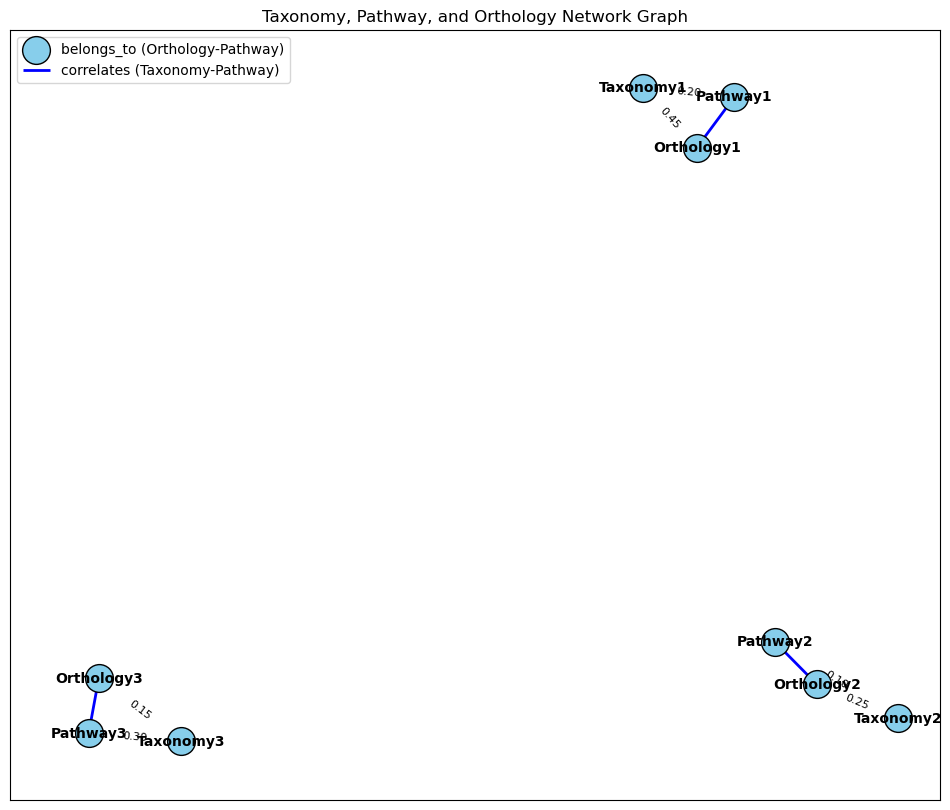

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 네트워크 그래프 생성
G = nx.Graph()

# 예시 데이터: 각 관계의 유형을 정의
# 예: Orthology와 Pathway 간의 소속 관계
orthology_pathway_edges = [
    ("Orthology1", "Pathway1"),
    ("Orthology2", "Pathway2"),
    ("Orthology3", "Pathway3")
]

# Taxonomy와 Pathway 간의 상관 관계 (상관 계수 포함)
taxonomy_pathway_edges = [
    ("Taxonomy1", "Pathway1", 0.2),
    ("Taxonomy2", "Pathway2", 0.1),
    ("Taxonomy3", "Pathway3", 0.3)
]

# Taxonomy와 Orthology 간의 상관 관계 (상관 계수 포함)
taxonomy_orthology_edges = [
    ("Taxonomy1", "Orthology1", 0.45),
    ("Taxonomy2", "Orthology2", 0.25),
    ("Taxonomy3", "Orthology3", 0.15)
]

# 각 관계 유형에 맞게 그래프에 노드와 간선 추가
# Orthology-Pathway 관계 추가 (소속 관계)
G.add_edges_from(orthology_pathway_edges, relationship="belongs_to")

# Taxonomy-Pathway 관계 추가 (상관 관계)
for node1, node2, weight in taxonomy_pathway_edges:
    G.add_edge(node1, node2, weight=weight, relationship="correlates")

# Taxonomy-Orthology 관계 추가 (상관 관계)
for node1, node2, weight in taxonomy_orthology_edges:
    G.add_edge(node1, node2, weight=weight, relationship="correlates")

# 노드 위치 설정
pos = nx.spring_layout(G)

# 노드 그리기
plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G, pos, node_size=400, node_color="skyblue", edgecolors="black")
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

# 간선 그리기: 관계 유형에 따라 다르게 표시
# Orthology-Pathway 관계 (소속 관계)는 굵은 실선으로
orthology_pathway_edges_draw = [(u, v) for u, v, d in G.edges(data=True) if d["relationship"] == "belongs_to"]
nx.draw_networkx_edges(G, pos, edgelist=orthology_pathway_edges_draw, style="solid", width=2, edge_color="blue", label="belongs_to")

# Taxonomy-Pathway 관계 (상관 관계)는 점선으로
taxonomy_pathway_edges_draw = [(u, v) for u, v, d in G.edges(data=True) if d["relationship"] == "correlates" and (u.startswith("Taxonomy") and v.startswith("Pathway"))]
nx.draw_networkx_edges(G, pos, edgelist=taxonomy_pathway_edges_draw, style="dashed", width=1.5, edge_color="green", label="correlates (Taxonomy-Pathway)")

# Taxonomy-Orthology 관계 (상관 관계)는 얇은 실선으로
taxonomy_orthology_edges_draw = [(u, v) for u, v, d in G.edges(data=True) if d["relationship"] == "correlates" and (u.startswith("Taxonomy") and v.startswith("Orthology"))]
nx.draw_networkx_edges(G, pos, edgelist=taxonomy_orthology_edges_draw, style="solid", width=1, edge_color="red", label="correlates (Taxonomy-Orthology)")

# 간선 레이블 추가 (상관 계수 표시)
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True) if 'weight' in d}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# 범례 및 제목 설정
plt.legend(["belongs_to (Orthology-Pathway)", "correlates (Taxonomy-Pathway)", "correlates (Taxonomy-Orthology)"], loc="upper left")
plt.title("Taxonomy, Pathway, and Orthology Network Graph") 
plt.show()


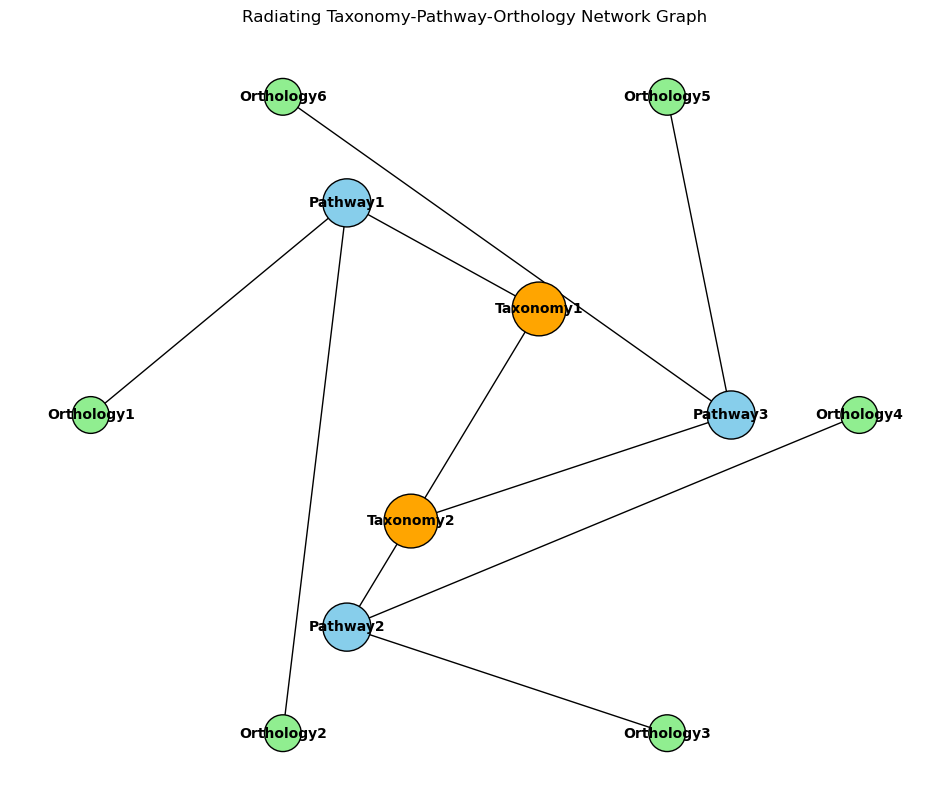

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# 네트워크 그래프 생성
G = nx.Graph()

# Taxonomy, Pathway, Orthology 정의
taxonomies = ["Taxonomy1", "Taxonomy2"]
pathways = {
    "Taxonomy1": ["Pathway1", "Pathway2"],
    "Taxonomy2": ["Pathway3"]
}
orthologies = {
    "Pathway1": ["Orthology1", "Orthology2"],
    "Pathway2": ["Orthology3", "Orthology4"],
    "Pathway3": ["Orthology5", "Orthology6"]
}

# 노드와 간선 추가
# Taxonomy 노드를 큰 노드로 추가
for taxonomy in taxonomies:
    G.add_node(taxonomy, size=1500, color="orange")

# Pathway와 Orthology 간 관계 추가
for taxonomy, pathway_list in pathways.items():
    for pathway in pathway_list:
        G.add_node(pathway, size=1200, color="skyblue")  # Pathway 노드 추가
        G.add_edge(taxonomy, pathway)  # Taxonomy와 Pathway 연결
        
        # 각 Pathway에 속한 Orthology 노드 추가
        for orthology in orthologies[pathway]:
            G.add_node(orthology, size=700, color="lightgreen")  # Orthology 노드 추가
            G.add_edge(pathway, orthology)  # Pathway와 Orthology 연결

# 노드 위치 설정: 방사형 배치 (중앙에 Taxonomy, Pathway와 Orthology는 주변으로)
# 각 레이어를 nlist에 명확히 지정
pos = nx.shell_layout(G, nlist=[taxonomies, list(pathways["Taxonomy1"] + pathways["Taxonomy2"]), sum(orthologies.values(), [])])

# 그래프 그리기
plt.figure(figsize=(12, 10))

# 각 노드 유형에 따라 다른 크기와 색상 설정
node_sizes = [G.nodes[node]["size"] for node in G.nodes()]
node_colors = [G.nodes[node]["color"] for node in G.nodes()]

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, edgecolors="black")
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

# 간선 그리기
nx.draw_networkx_edges(G, pos, width=1)

# 제목 설정
plt.title("Radiating Taxonomy-Pathway-Orthology Network Graph")
plt.axis("off")  # 축 제거
plt.show()
